In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
corr = np.load('corrAutoencoderDenoise.npy')

In [4]:
corr_hc = corr[0:52]
corr_schz = corr[52:]

In [5]:
corr_hc.shape

(52, 16)

In [6]:
corr_hc = corr_hc.reshape(52,16)

In [7]:
corr_schz = corr_schz.reshape(50,16)

In [8]:
X = np.append(corr_hc,corr_schz,axis=0)

In [9]:
X.shape

(102, 16)

In [10]:
X[0].shape

(16,)

In [11]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [12]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [14]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [15]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [16]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [17]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.712321 (0.134450)
SVM: 0.623333 (0.099299)
KNN: 0.611845 (0.118886)
LR: 0.611845 (0.119639)
MLP: 0.638452 (0.150450)
RF: 0.686071 (0.102543)
ET: 0.629821 (0.162554)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964628, p:0.045329
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.715437, p:0.638511
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

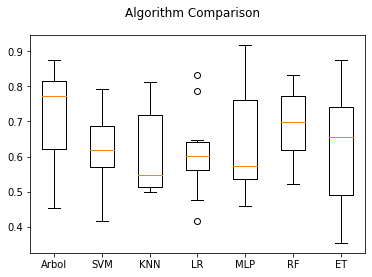

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.706667 (0.239931)
SVM: 0.596667 (0.233190)
KNN: 0.495000 (0.244728)
LR: 0.590238 (0.244788)
MLP: 0.632381 (0.299388)
RF: 0.676071 (0.272158)
ET: 0.609048 (0.279662)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.929827, p:0.000732
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.436202, p:0.851946
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

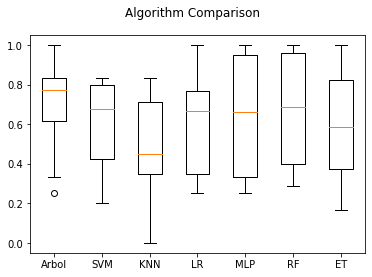

In [19]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.662500 (0.226223)
SVM: 0.655357 (0.150454)
KNN: 0.600000 (0.282682)
LR: 0.643452 (0.134594)
MLP: 0.579167 (0.196664)
RF: 0.660119 (0.113890)
ET: 0.611905 (0.202954)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.956851, p:0.016829
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.335525, p:0.254852
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

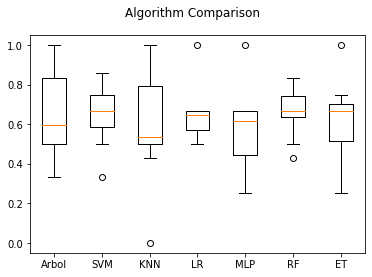

In [20]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.703636 (0.121574)
SVM: 0.638182 (0.090982)
KNN: 0.547273 (0.152109)
LR: 0.597273 (0.115139)
MLP: 0.599091 (0.146950)
RF: 0.659091 (0.108426)
ET: 0.600909 (0.144511)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957091, p:0.017343
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.426815, p:0.858398
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

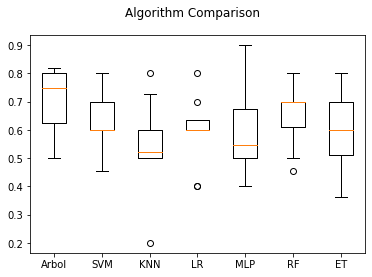

In [21]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')